# A Machine Learning Based Approach To Classify Electrical Line Disturbance From Phasor Measurement Unit (PMU) Data  

## Short circuit fault analysis is performed to categorize faults in Electrical grid.

## There are two categories of short circuit faults, such as

##    Symmetrical Faults (Three Phase Faults):

  ###       -Line to line to line to ground (L-L-L-G)
  ###      -Line to line to line (L-L-L)

##    Unsymmetrical Faults (One & Two Phase Faults):

  ###        -Line to ground (L-G)
  ###       -Line to line (L-L)
  ###        -Double line to ground (LL-G)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
#Importing Dataset
PMU_Class = pd.read_csv('/content/Updated_Data.csv')

# Data Wrangling

In [ ]:
# Visualizing top 5 rows from the Dataset
PMU_Class.head()

,time_stamp,Ia,Ib,Ic,Va,Vb,Vc,f,pa,fault_types
0,0.000000e+00,7.807983,-5.032784,-2.775199,521.088340,-332.788490,-188.299850,60.0,0.0,NF
1,2.670000e-10,7.807980,-5.032781,-2.775199,521.088155,-332.788304,-188.299850,60.0,0.0,NF
2,8.010000e-10,7.807976,-5.032776,-2.775199,521.087864,-332.787993,-188.299871,60.0,0.0,NF
3,1.330000e-09,7.807973,-5.032773,-2.775200,521.087699,-332.787777,-188.299923,60.0,0.0,NF
4,2.270000e-09,7.807971,-5.032769,-2.775202,521.087562,-332.787511,-188.300050,60.0,0.0,NF


In [ ]:
# PMU_Class
print(f"The Dataset to be classified has {PMU_Class.shape[0]} rows and {PMU_Class.shape[1]} columns.")

The Dataset to be classified has 110115 rows and 10 columns.


In [ ]:
PMU_Class.isnull().sum()

time_stamp     0
Ia             0
Ib             0
Ic             0
Va             0
Vb             0
Vc             0
f              0
pa             0
fault_types    0
dtype: int64

In [ ]:
# Null values identification
PMU_Class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84399 entries, 0 to 84398
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_stamp   84399 non-null  float64
 1   Ia           84399 non-null  float64
 2   Ib           84399 non-null  float64
 3   Ic           84399 non-null  float64
 4   Va           84399 non-null  float64
 5   Vb           84399 non-null  float64
 6   Vc           84399 non-null  float64
 7   f            84399 non-null  float64
 8   pa           84399 non-null  float64
 9   fault_types  84399 non-null  object 
dtypes: float64(9), object(1)
memory usage: 7.1+ MB


In [ ]:
# Dataset description
PMU_Class.describe()

,time_stamp,Ia,Ib,Ic,Va,Vb,Vc,f,pa
count,84399.000000,84399.000000,84399.000000,84399.000000,84399.000000,84399.000000,84399.000000,84399.000000,84399.000000
mean,0.099413,0.054853,0.017346,0.089126,3.979216,2.954194,4.347446,60.104847,51.917293
std,0.050576,2.072378,2.813727,3.258316,138.170204,187.282207,217.363973,0.135210,79.007579
min,0.000000,-7.921290,-7.923076,-7.921709,-528.076263,-528.187316,-528.103521,59.792450,-179.683701
25%,0.062913,-0.012721,-0.045939,0.042030,-0.293546,-0.330811,-0.449210,59.993456,0.000000
50%,0.111237,-0.011426,-0.044120,0.055598,-0.204506,-0.215634,0.428418,60.134536,94.707873
75%,0.125623,-0.003946,-0.035181,0.055955,0.273339,0.367518,0.451177,60.214537,104.862371
max,0.200000,7.923258,7.925046,7.923846,528.215845,528.320014,528.206497,60.450793,179.935299


In [ ]:
# Identify duplication
print(f"Dataset Classify has {PMU_Class.duplicated().sum()} duplicate values.")

Dataset Classify has 18425 duplicate values.


In [ ]:
# Clearing duplicate values
PMU_Class.drop_duplicates(keep = False,inplace = True)

In [ ]:
# Identify duplication
print(f"Dataset Classify has {PMU_Class.duplicated().sum()} duplicate values.")

Dataset Classify has 0 duplicate values.


In [ ]:
# Updated dataset size
PMU_Class.shape

(53557, 10)

# Feature Engineering

In [ ]:
# Categorizing differnt faults
NF = PMU_Class[PMU_Class['fault_types']=='NF']
LG = PMU_Class[PMU_Class['fault_types']=='LG'] 
LL = PMU_Class[PMU_Class['fault_types']=='LL'] 
LLG = PMU_Class[PMU_Class['fault_types']=='LLG'] 
LLL = PMU_Class[PMU_Class['fault_types']=='LLL'] 
LLLG = PMU_Class[PMU_Class['fault_types']=='LLLG']

In [ ]:
# Separating data
No_Fault = PMU_Class[PMU_Class['fault_types']=='NF']
Fault = PMU_Class[PMU_Class['fault_types']!=('NF')] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


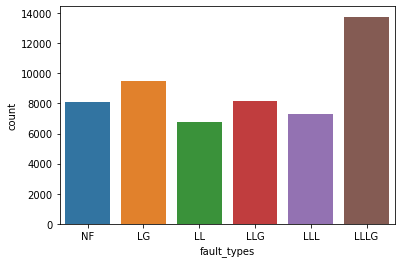

In [ ]:
sns.countplot(PMU_Class['fault_types'])

# Exploratory Data Analysis (EDA)

# Univariate Analysis

# Phase Angle

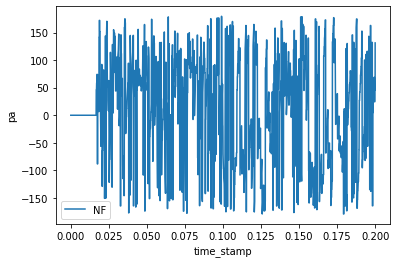

In [ ]:
# Phase Angle under NF condition

sns.lineplot(x='time_stamp', y='pa', data=NF, label='NF')

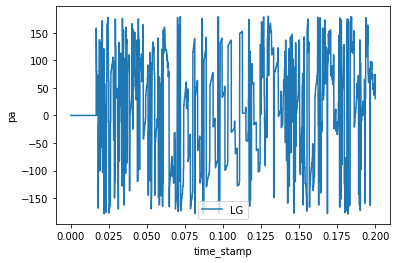

In [ ]:
# Phase Angle under LG fault condition

sns.lineplot(x='time_stamp', y='pa', data=LG, label='LG')

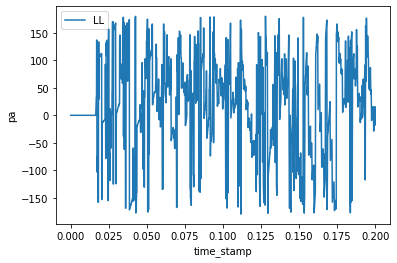

In [ ]:
# Phase Angle under LL fault condition

sns.lineplot(x='time_stamp', y='pa', data=LL, label='LL')

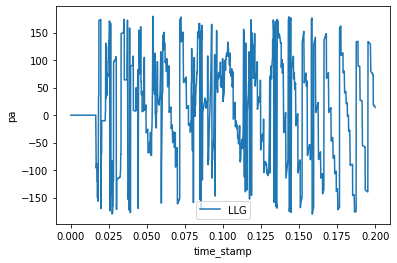

In [ ]:
# Phase Angle under LLG fault condition

sns.lineplot(x='time_stamp', y='pa', data=LLG, label='LLG')

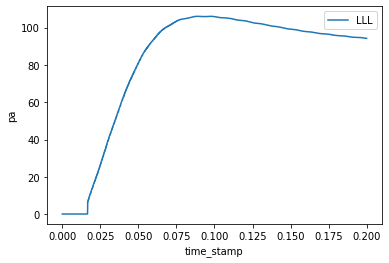

In [ ]:
# Phase Angle under LLL fault condition

sns.lineplot(x='time_stamp', y='pa', data=LLL, label='LLL')

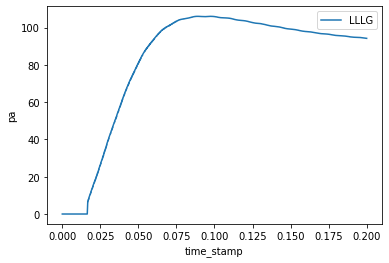

In [ ]:
# Phase Angle under LLLG fault condition

sns.lineplot(x='time_stamp', y='pa', data=LLLG, label='LLLG')

# Frequency

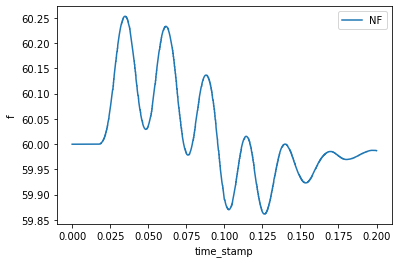

In [ ]:
# Frequency under NF condition
import seaborn as sns

sns.lineplot(x='time_stamp', y='f', data=NF, label='NF')

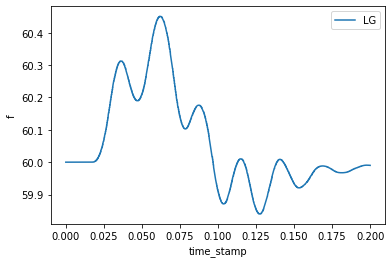

In [ ]:
# Frequency under LG condition
import seaborn as sns

sns.lineplot(x='time_stamp', y='f', data=LG, label='LG')


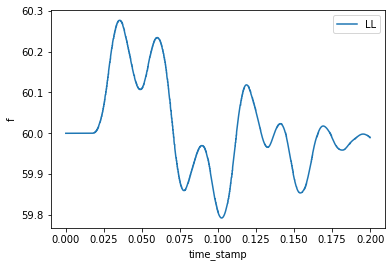

In [ ]:
# Frequency under LL condition
import seaborn as sns

sns.lineplot(x='time_stamp', y='f', data=LL, label='LL')

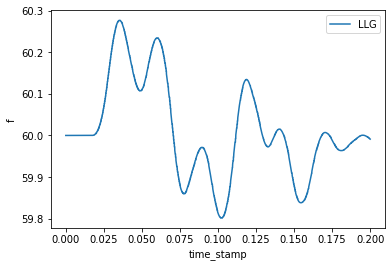

In [ ]:
# Frequency under LLG condition
import seaborn as sns

sns.lineplot(x='time_stamp', y='f', data=LLG, label='LLG')

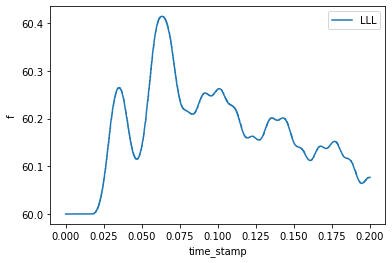

In [ ]:
# Frequency under LLL condition
import seaborn as sns

sns.lineplot(x='time_stamp', y='f', data=LLL, label='LLL')

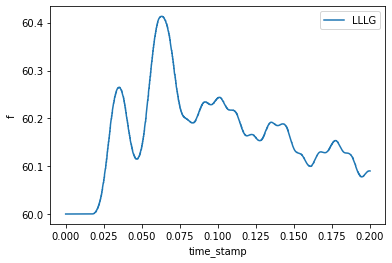

In [ ]:
# Frequency under LLLG condition
import seaborn as sns

sns.lineplot(x='time_stamp', y='f', data=LLLG, label='LLLG')

## Multivariate Analysis

# Voltage & Current

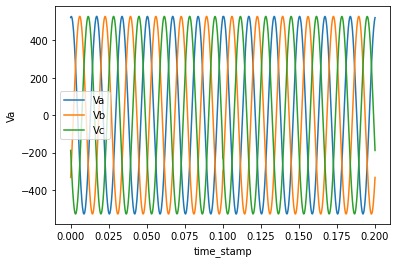

In [ ]:
# Voltage phases under no NF condition

sns.lineplot(x='time_stamp', y='Va', data=NF, label='Va')
sns.lineplot(x='time_stamp', y='Vb', data=NF, label='Vb')
sns.lineplot(x='time_stamp', y='Vc', data=NF, label='Vc')

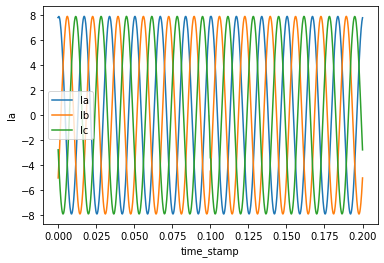

In [ ]:
# Current phases under NF condition

sns.lineplot(x='time_stamp', y='Ia', data=NF, label='Ia')
sns.lineplot(x='time_stamp', y='Ib', data=NF, label='Ib')
sns.lineplot(x='time_stamp', y='Ic', data=NF, label='Ic')

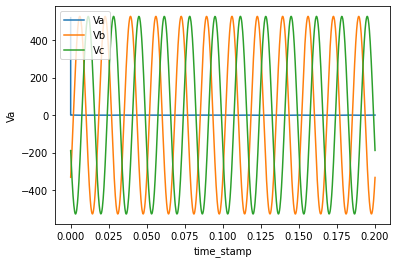

In [ ]:
# Voltage phases under LG fault condition

sns.lineplot(x='time_stamp', y='Va', data=LG, label='Va')
sns.lineplot(x='time_stamp', y='Vb', data=LG, label='Vb')
sns.lineplot(x='time_stamp', y='Vc', data=LG, label='Vc')


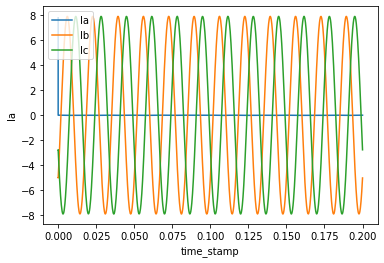

In [ ]:
# Current phases under LG fault condition

sns.lineplot(x='time_stamp', y='Ia', data=LG, label='Ia')
sns.lineplot(x='time_stamp', y='Ib', data=LG, label='Ib')
sns.lineplot(x='time_stamp', y='Ic', data=LG, label='Ic')

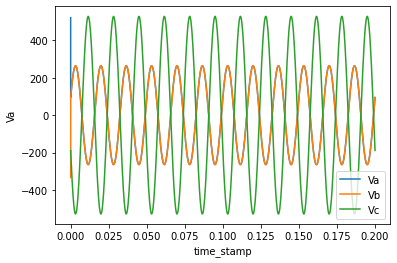

In [ ]:
# Voltage phases under LL fault condition

sns.lineplot(x='time_stamp', y='Va', data=LL, label='Va')
sns.lineplot(x='time_stamp', y='Vb', data=LL, label='Vb')
sns.lineplot(x='time_stamp', y='Vc', data=LL, label='Vc')

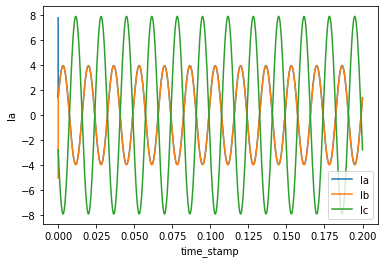

In [ ]:
# Current phases under LL fault condition

sns.lineplot(x='time_stamp', y='Ia', data=LL, label='Ia')
sns.lineplot(x='time_stamp', y='Ib', data=LL, label='Ib')
sns.lineplot(x='time_stamp', y='Ic', data=LL, label='Ic')

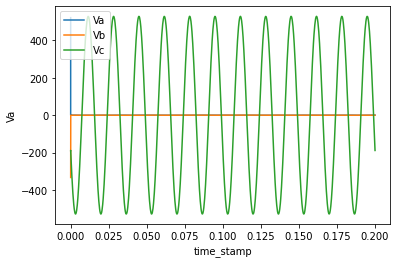

In [ ]:
# Voltage phases under LLG fault condition

sns.lineplot(x='time_stamp', y='Va', data=LLG, label='Va')
sns.lineplot(x='time_stamp', y='Vb', data=LLG, label='Vb')
sns.lineplot(x='time_stamp', y='Vc', data=LLG, label='Vc')

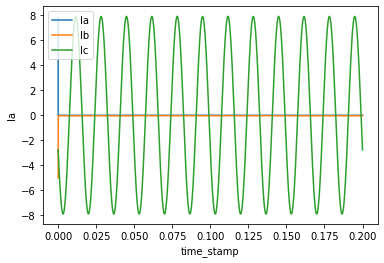

In [ ]:
# Current phases under LLG fault condition

sns.lineplot(x='time_stamp', y='Ia', data=LLG, label='Ia')
sns.lineplot(x='time_stamp', y='Ib', data=LLG, label='Ib')
sns.lineplot(x='time_stamp', y='Ic', data=LLG, label='Ic')

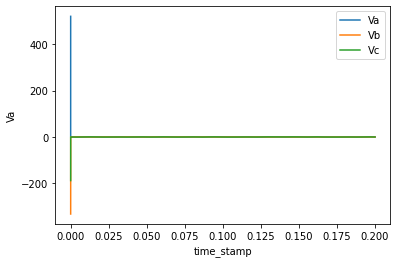

In [ ]:
# Voltage phases under LLL fault condition

sns.lineplot(x='time_stamp', y='Va', data=LLL, label='Va')
sns.lineplot(x='time_stamp', y='Vb', data=LLL, label='Vb')
sns.lineplot(x='time_stamp', y='Vc', data=LLL, label='Vc')

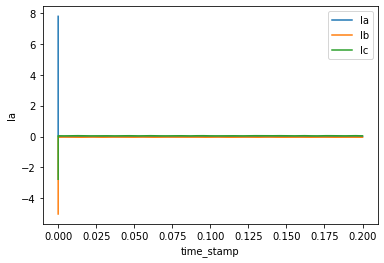

In [ ]:
# Current phases under LLL fault condition

sns.lineplot(x='time_stamp', y='Ia', data=LLL, label='Ia')
sns.lineplot(x='time_stamp', y='Ib', data=LLL, label='Ib')
sns.lineplot(x='time_stamp', y='Ic', data=LLL, label='Ic')

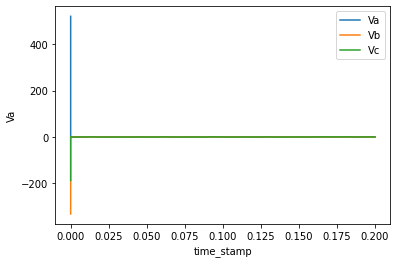

In [ ]:
# Voltage phases under LLLG fault condition

sns.lineplot(x='time_stamp', y='Va', data=LLLG, label='Va')
sns.lineplot(x='time_stamp', y='Vb', data=LLLG, label='Vb')
sns.lineplot(x='time_stamp', y='Vc', data=LLLG, label='Vc')

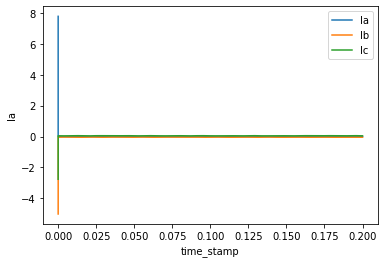

In [ ]:
# Current phases under LLLG fault condition

sns.lineplot(x='time_stamp', y='Ia', data=LLLG, label='Ia')
sns.lineplot(x='time_stamp', y='Ib', data=LLLG, label='Ib') 
sns.lineplot(x='time_stamp', y='Ic', data=LLLG, label='Ic')

## Voltage & Cureent Distribution

From the analysis, we can see in terms of no fault codition dtribution for voltage & currents is normal but in terms of faults it is not normal.

Va: -0.16290361208310875
-1.5995265096203732
Vb: 0.06987562169634498
-1.4871688102333054
Vc: 0.1242358445926762
-1.32974074321258
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

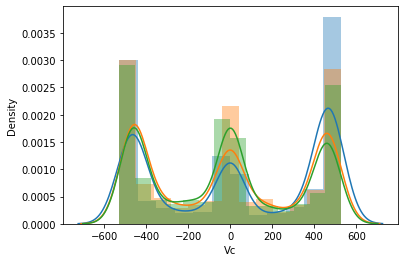

In [ ]:
print('Va:',No_Fault['Va'].skew())
print(No_Fault['Va'].kurt())
print('Vb:',No_Fault['Vb'].skew())
print(No_Fault['Vb'].kurt())
print('Vc:',No_Fault['Vc'].skew())
print(No_Fault['Vc'].kurt())
print('-' *100)
sns.distplot(No_Fault['Va'])
sns.distplot(No_Fault['Vb'])
sns.distplot(No_Fault['Vc'])

Ia: -0.16268847066137537
-1.5995872681769698
Ib: 0.07145746904998689
-1.4881509819585863
Ic: 0.12395162562770484
-1.328271867761445
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

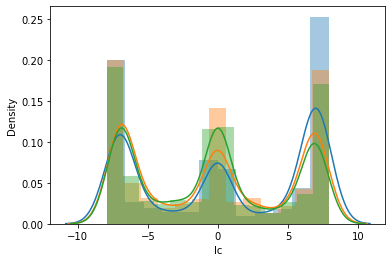

In [ ]:
print('Ia:',No_Fault['Ia'].skew())
print(No_Fault['Ia'].kurt())
print('Ib:',No_Fault['Ib'].skew())
print(No_Fault['Ib'].kurt())
print('Ic:',No_Fault['Ic'].skew())
print(No_Fault['Ic'].kurt())
print('-' *100)
sns.distplot(No_Fault['Ia'])
sns.distplot(No_Fault['Ib'])
sns.distplot(No_Fault['Ic'])

Va: -0.056281062189671875
29.042281121378572
Vb: 0.11575049956681747
4.845087125589657
Vc: 0.09907615499262079
2.2558383653148626
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

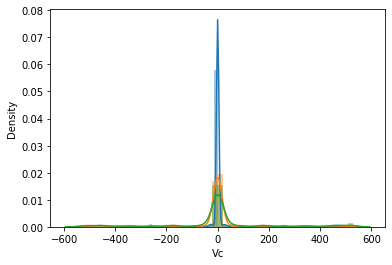

In [ ]:
print('Va:',Fault['Va'].skew())
print(Fault['Va'].kurt())
print('Vb:',Fault['Vb'].skew())
print(Fault['Vb'].kurt())
print('Vc:',Fault['Vc'].skew())
print(Fault['Vc'].kurt())
print('-' *100)
sns.distplot(Fault['Va'])
sns.distplot(Fault['Vb'])
sns.distplot(Fault['Vc'])

Ia: 0.046023053375454655
28.87772034320148
Ib: 0.15376179366872159
4.818992541713791
Ic: 0.06916270016183966
2.2605536359736425
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

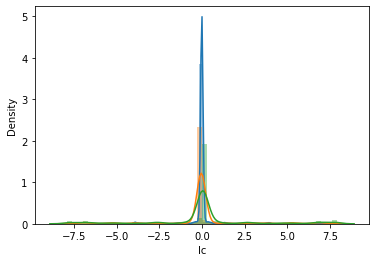

In [ ]:
print('Ia:',Fault['Ia'].skew())
print(Fault['Ia'].kurt())
print('Ib:',Fault['Ib'].skew())
print(Fault['Ib'].kurt())
print('Ic:',Fault['Ic'].skew())
print(Fault['Ic'].kurt())
print('-' *100)
sns.distplot(Fault['Ia'])
sns.distplot(Fault['Ib'])
sns.distplot(Fault['Ic'])

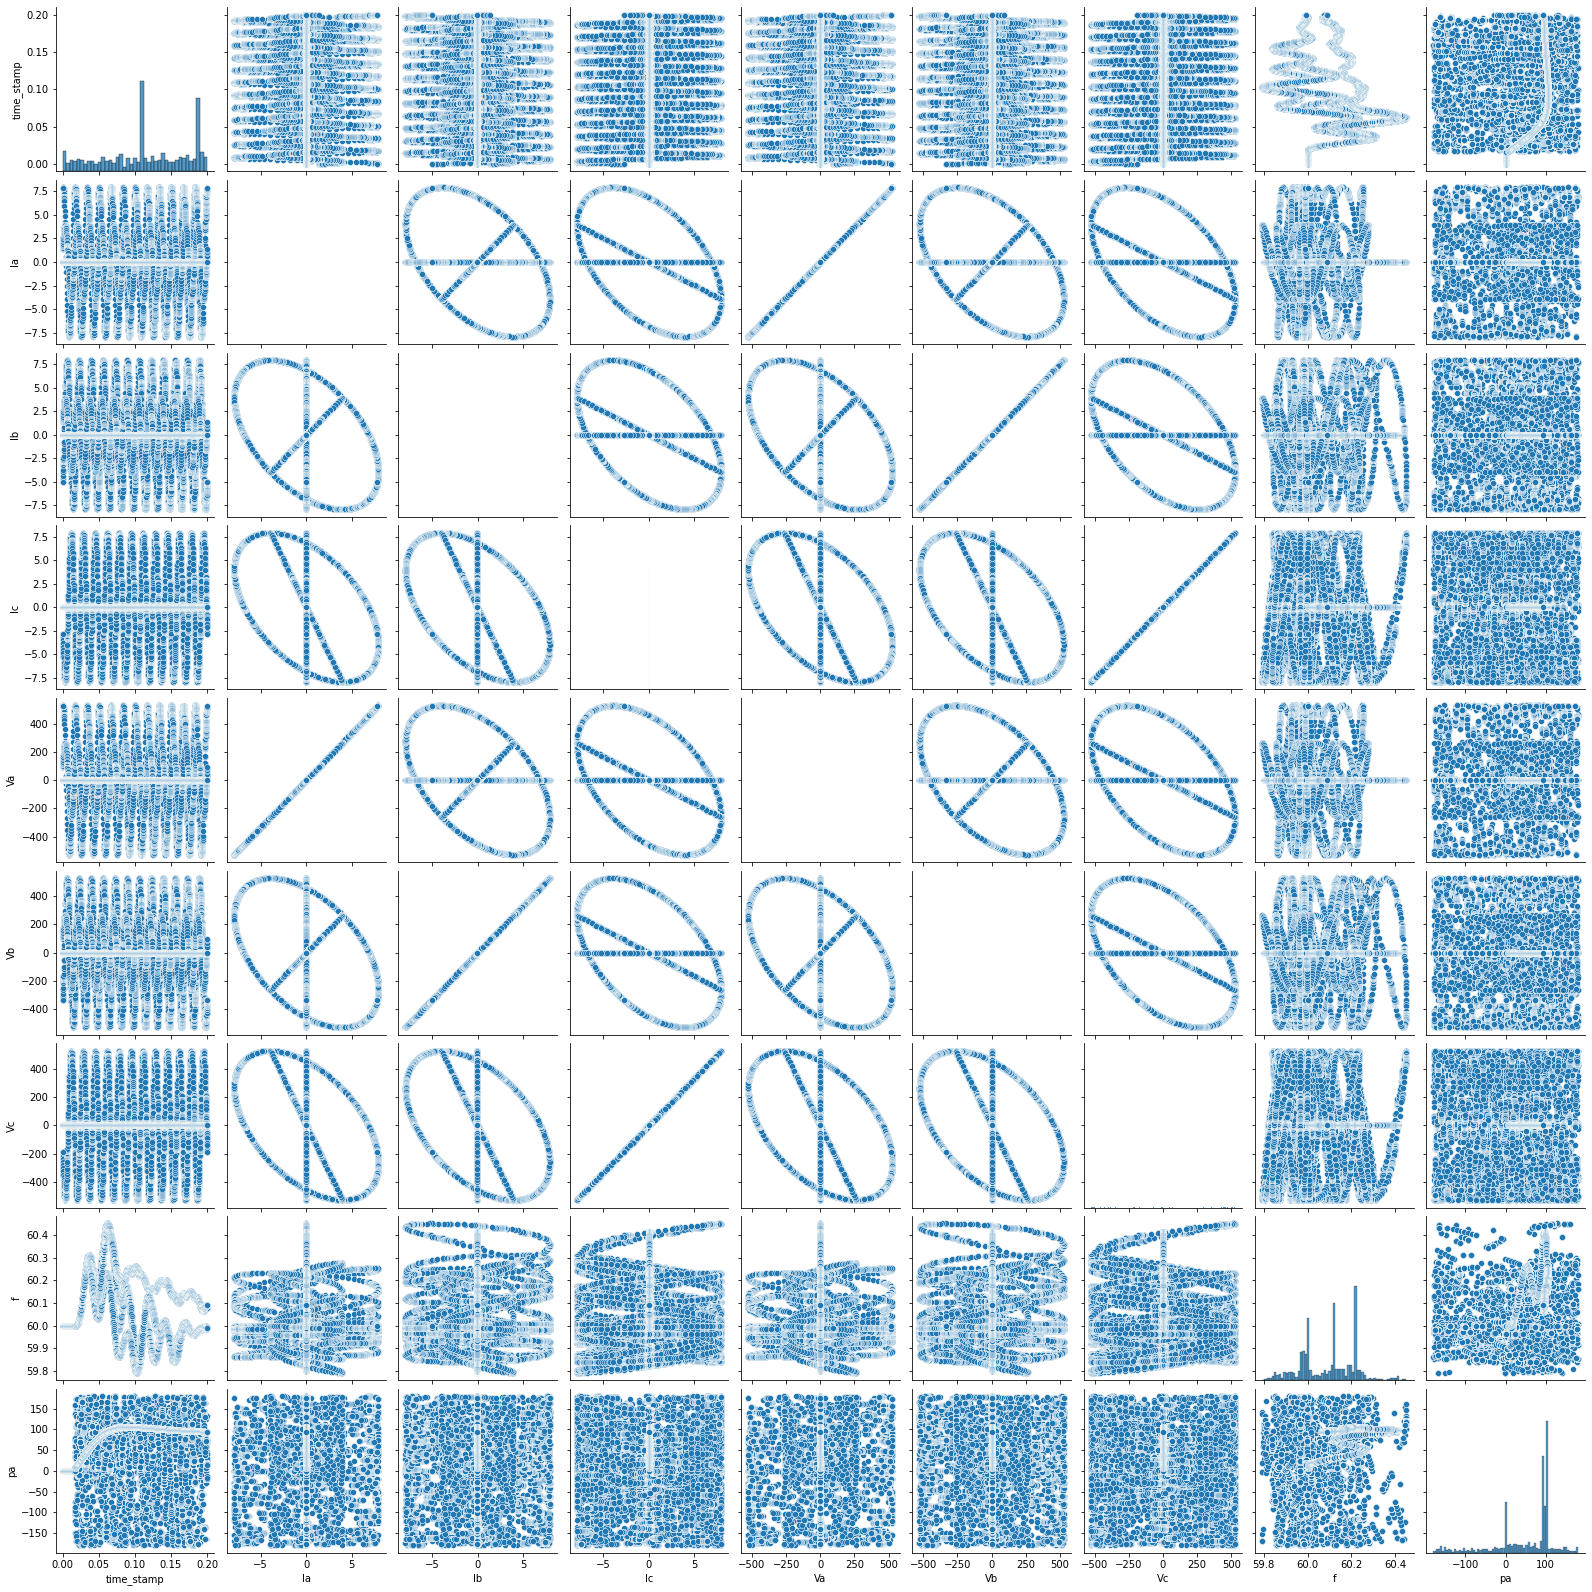

In [ ]:
## Pair Plot
sns.pairplot(PMU_Class)

# Outliers

### Normal Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


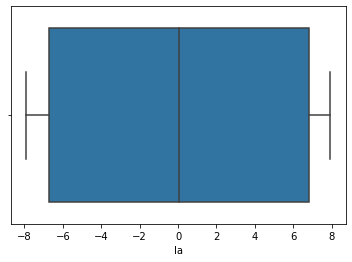

In [ ]:
sns.boxplot(No_Fault['Ia'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


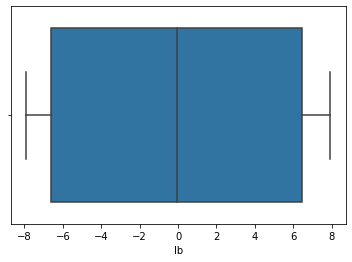

In [ ]:
sns.boxplot(No_Fault['Ib'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


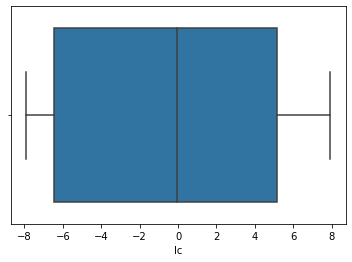

In [ ]:
sns.boxplot(No_Fault['Ic'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


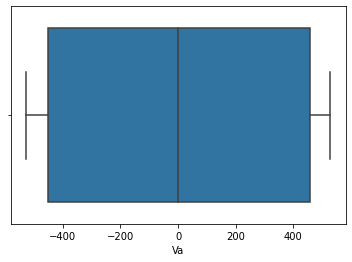

In [ ]:
sns.boxplot(No_Fault['Va'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


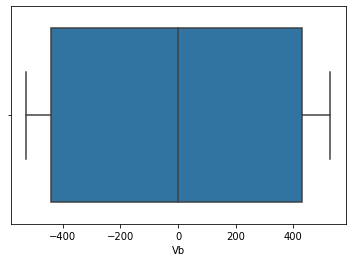

In [ ]:
sns.boxplot(No_Fault['Vb'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


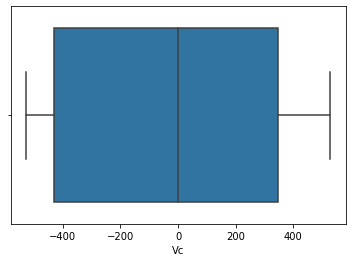

In [ ]:
sns.boxplot(No_Fault['Vc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


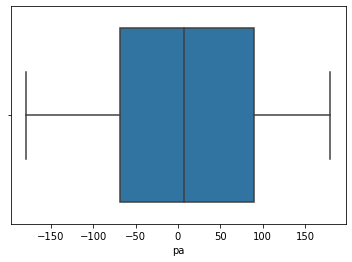

In [ ]:
sns.boxplot(No_Fault['pa'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


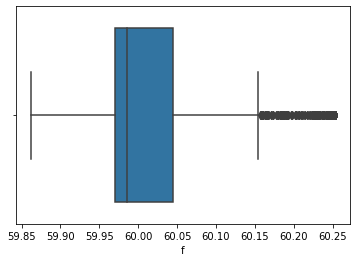

In [ ]:
sns.boxplot(No_Fault['f'])

### Skewed Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


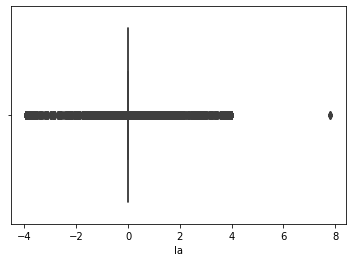

In [ ]:
sns.boxplot(Fault['Ia'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


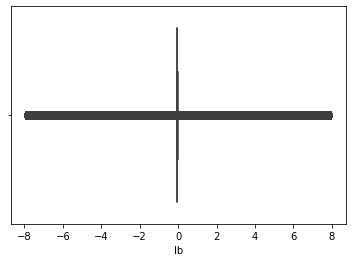

In [ ]:
sns.boxplot(Fault['Ib'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


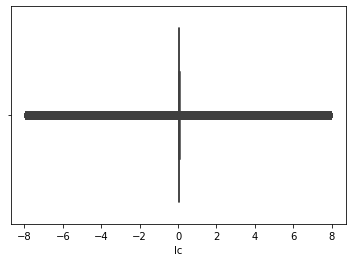

In [ ]:
sns.boxplot(Fault['Ic'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


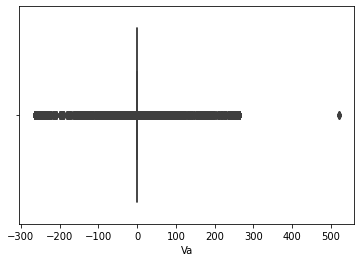

In [ ]:
sns.boxplot(Fault['Va'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


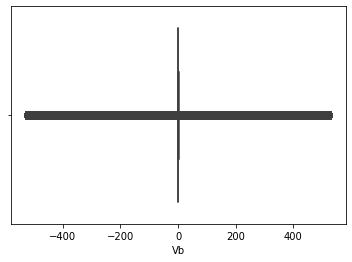

In [ ]:
sns.boxplot(Fault['Vb'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


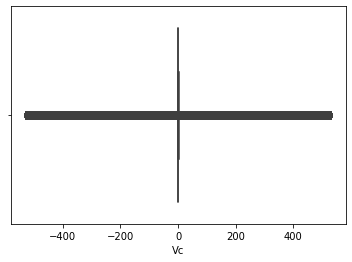

In [ ]:
sns.boxplot(Fault['Vc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


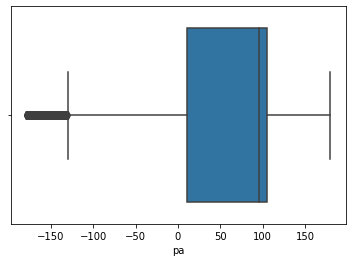

In [ ]:
sns.boxplot(Fault['pa'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


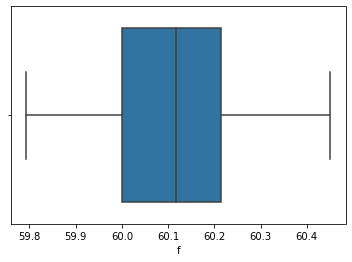

In [ ]:
sns.boxplot(Fault['f'])

# Converting Categorical Features

In [ ]:
Numeric_Data = pd.get_dummies(data = PMU_Class, columns = ['fault_types'],drop_first=True)

In [ ]:
Numeric_Data.head()

,time_stamp,Ia,Ib,Ic,Va,Vb,Vc,f,pa,fault_types_LL,fault_types_LLG,fault_types_LLL,fault_types_LLLG,fault_types_NF
0,0.000000e+00,7.807983,-5.032784,-2.775199,521.088340,-332.788490,-188.299850,60.0,0.0,0,0,0,0,1
1,2.670000e-10,7.807980,-5.032781,-2.775199,521.088155,-332.788304,-188.299850,60.0,0.0,0,0,0,0,1
2,8.010000e-10,7.807976,-5.032776,-2.775199,521.087864,-332.787993,-188.299871,60.0,0.0,0,0,0,0,1
3,1.330000e-09,7.807973,-5.032773,-2.775200,521.087699,-332.787777,-188.299923,60.0,0.0,0,0,0,0,1
4,2.270000e-09,7.807971,-5.032769,-2.775202,521.087562,-332.787511,-188.300050,60.0,0.0,0,0,0,0,1


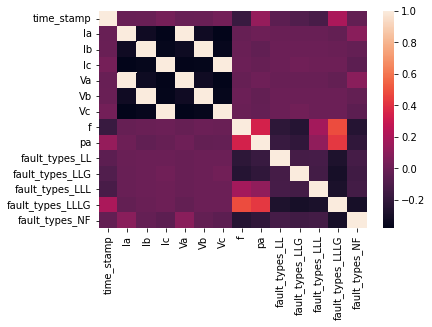

In [ ]:
#Correlation Matrix
sns.heatmap(Numeric_Data.corr())

# Classification

In [ ]:
# input features

features = ['time_stamp','Ia', 'Ib','Ic','Va','Vb','Vc','f','pa']

In [ ]:
x = PMU_Class[features] # Collection of features
y = PMU_Class['fault_types'] # Target or the labels to predict

In [ ]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

y = le.fit_transform(y)

In [ ]:
# Train & Test dataset split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)

In [ ]:
# Principal Component Analysis

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Pipeline

In [ ]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.plot_confusion_matrix(knnclassifier,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Support Vector OneVsRest Classifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
SVC = SVC()
SVC_O_VS_R = OneVsRestClassifier(SVC)
SVC_O_VS_R.fit(x_train,y_train)
y_pred = SVC_O_VS_R.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_R,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


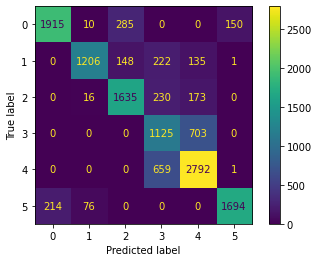

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2360
           1       0.92      0.70      0.80      1712
           2       0.79      0.80      0.79      2054
           3       0.50      0.62      0.55      1828
           4       0.73      0.81      0.77      3452
           5       0.92      0.85      0.88      1984

    accuracy                           0.77     13390
   macro avg       0.79      0.76      0.78     13390
weighted avg       0.79      0.77      0.78     13390



In [ ]:
# Support Vector OneVsOne Classifier

from sklearn.multiclass import OneVsOneClassifier
SVC_O_VS_O = OneVsOneClassifier(SVC)
SVC_O_VS_O.fit(x_train,y_train)
y_pred = SVC_O_VS_O.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_O,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


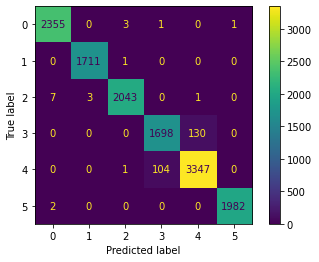

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2360
           1       1.00      1.00      1.00      1712
           2       1.00      0.99      1.00      2054
           3       0.94      0.93      0.94      1828
           4       0.96      0.97      0.97      3452
           5       1.00      1.00      1.00      1984

    accuracy                           0.98     13390
   macro avg       0.98      0.98      0.98     13390
weighted avg       0.98      0.98      0.98     13390



In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
metrics.plot_confusion_matrix(DT,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


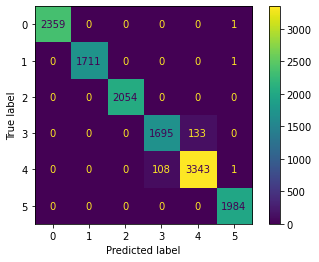

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2360
           1       1.00      1.00      1.00      1712
           2       1.00      1.00      1.00      2054
           3       0.94      0.93      0.93      1828
           4       0.96      0.97      0.97      3452
           5       1.00      1.00      1.00      1984

    accuracy                           0.98     13390
   macro avg       0.98      0.98      0.98     13390
weighted avg       0.98      0.98      0.98     13390



In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
metrics.plot_confusion_matrix(RF,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


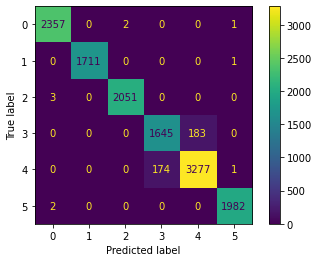

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2360
           1       1.00      1.00      1.00      1712
           2       1.00      1.00      1.00      2054
           3       0.90      0.90      0.90      1828
           4       0.95      0.95      0.95      3452
           5       1.00      1.00      1.00      1984

    accuracy                           0.97     13390
   macro avg       0.97      0.97      0.97     13390
weighted avg       0.97      0.97      0.97     13390



In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
metrics.plot_confusion_matrix(GB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


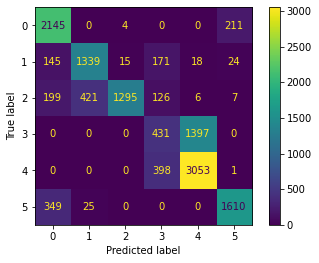

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      2360
           1       0.75      0.78      0.77      1712
           2       0.99      0.63      0.77      2054
           3       0.38      0.24      0.29      1828
           4       0.68      0.88      0.77      3452
           5       0.87      0.81      0.84      1984

    accuracy                           0.74     13390
   macro avg       0.74      0.71      0.71     13390
weighted avg       0.74      0.74      0.72     13390



In [ ]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
metrics.plot_confusion_matrix(GNB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


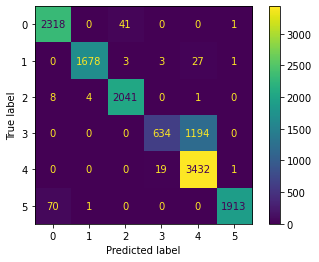

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2360
           1       1.00      0.98      0.99      1712
           2       0.98      0.99      0.99      2054
           3       0.97      0.35      0.51      1828
           4       0.74      0.99      0.85      3452
           5       1.00      0.96      0.98      1984

    accuracy                           0.90     13390
   macro avg       0.94      0.88      0.88     13390
weighted avg       0.92      0.90      0.88     13390



In [ ]:
# Multi-layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0, max_iter=300)
MLP.fit(x_train,y_train)
y_pred = MLP.predict(x_test)
metrics.plot_confusion_matrix(MLP,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


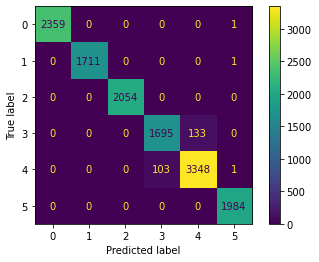

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2360
           1       1.00      1.00      1.00      1712
           2       1.00      1.00      1.00      2054
           3       0.94      0.93      0.93      1828
           4       0.96      0.97      0.97      3452
           5       1.00      1.00      1.00      1984

    accuracy                           0.98     13390
   macro avg       0.98      0.98      0.98     13390
weighted avg       0.98      0.98      0.98     13390



In [ ]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier
 
# Making the final model using voting classifier
ensemble_model = VotingClassifier(estimators=[('knn', knnclassifier), ('DT', DT), ('RF', RF)], voting='hard')
 
# training all the model on the train dataset
ensemble_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
y_pred = ensemble_model.predict(x_test)

metrics.plot_confusion_matrix(ensemble_model,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Evaluating & Comparing Models

In [ ]:
# Classifiers
names = ["knnclassifier", "SVC_O_VS_R", "SVC_O_VS_O", "DT", "RF", "GB", "GNB", "MLP", "ensemble_model"]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    OneVsRestClassifier(SVC),
    OneVsOneClassifier(SVC),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=0, max_iter=300),
    VotingClassifier(estimators=[('knn', knnclassifier), ('DT', DT), ('RF', RF)], voting='hard')]         

In [ ]:
from sklearn.metrics import accuracy_score

# Load accuracy score
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    validation_score = metrics.accuracy_score(y_test, y_pred)
    scores.append(validation_score)

In [ ]:
# Load data into data frame
df = pd.DataFrame()
df['name'] = names
df['validation_score'] = scores

In [ ]:
# Visualizing accuracy score
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,validation_score
0,knnclassifier,0.973488
1,SVC_O_VS_R,0.725616
2,SVC_O_VS_O,0.774235
3,DT,0.981031
4,RF,0.982001
5,GB,0.972591
6,GNB,0.737341
7,MLP,0.897386
8,ensemble_model,0.982001


# Hyperparameter Tuning

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
DT=DecisionTreeClassifier(random_state=7)
DT_randomcv=RandomizedSearchCV(estimator=DT,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

### fit the randomized model
DT_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=7),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=DT_randomcv.best_estimator_

In [ ]:
# Optimal Parameters
best_random_grid

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='auto',
                       min_samples_split=5, random_state=7)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=best_random_grid.predict(x_test)
print (f'Test Accuracy - : {best_random_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

Test Accuracy - : 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2377
           1       0.99      1.00      0.99      1672
           2       0.99      1.00      0.99      2129
           3       0.93      0.93      0.93      1750
           4       0.98      0.98      0.98      6095
           5       1.00      1.00      1.00      2057

    accuracy                           0.98     16080
   macro avg       0.98      0.98      0.98     16080
weighted avg       0.98      0.98      0.98     16080



## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [DT_randomcv.best_params_['max_features']],
    'max_depth': [DT_randomcv.best_params_['max_depth']],
    'min_samples_split': [DT_randomcv.best_params_['min_samples_split'],
                          DT_randomcv.best_params_['min_samples_split'] +1,
                          DT_randomcv.best_params_['min_samples_split'] + 2], 
    'min_samples_leaf': [DT_randomcv.best_params_['min_samples_leaf'],
                         DT_randomcv.best_params_['min_samples_leaf']+2, 
                         DT_randomcv.best_params_['min_samples_leaf'] + 4],          
    'criterion': [DT_randomcv.best_params_['criterion']],
}

print(param_grid)

{'max_features': ['auto'], 'max_depth': [560], 'min_samples_split': [5, 6, 7], 'min_samples_leaf': [1, 3, 5], 'criterion': ['entropy']}


In [ ]:
DT=DecisionTreeClassifier(random_state=7)
grid_search=GridSearchCV(estimator=DT,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 6, 7]},
             verbose=2)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
# Optimal Parameters
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='auto',
                       min_samples_split=6, random_state=7)

In [ ]:
y_pred=best_grid.predict(x_test)
print (f'Test Accuracy - : {best_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

Test Accuracy - : 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2377
           1       0.99      0.99      0.99      1672
           2       1.00      1.00      1.00      2129
           3       0.93      0.93      0.93      1750
           4       0.98      0.98      0.98      6095
           5       1.00      1.00      1.00      2057

    accuracy                           0.98     16080
   macro avg       0.98      0.98      0.98     16080
weighted avg       0.98      0.98      0.98     16080

